In [ ]:
zip_path = '/content/drive/My\ Drive/Dataset/Santa_image/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

!rm /content/santa-dataset.zip

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
# import vgg16
from tensorflow.keras.applications import vgg16
# import Dropout layers
from keras.layers import Dropout

vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
for layer in vgg_conv.layers[:]:
  layer.trainable = False

fine_model = Sequential()
fine_model.add(vgg_conv)
fine_model.add(Flatten())
fine_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
fine_model.add(Dropout(0.5))
fine_model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.001)
fine_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
fine_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 17,074,241
Trainable params: 2,359,553
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
dataset_dir = '/content/santa-dataset'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rescale=1.0/255.0)
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
history_model_tunning = fine_model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=100)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
6/6 [==============================] - 19s 3s/step - loss: 1.1441 - accuracy: 0.6284 - val_loss: 0.4601 - val_accuracy: 0.7808
Epoch 2/100
6/6 [==============================] - 18s 3s/step - loss: 0.3314 - accuracy: 0.8640 - val_loss: 0.2114 - val_accuracy: 0.9192
Epoch 3/100
6/6 [==============================] - 19s 3s/step - loss: 0.2120 - accuracy: 0.9199 - val_loss: 0.1853 - val_accuracy: 0.9423
Epoch 4/100
6/6 [==============================] - 21s 3s/step - loss: 0.1541 - accuracy: 0.9260 - val_loss: 0.1679 - val_accuracy: 0.9423
Epoch 5/100
6/6 [==============================] - 19s 3s/step - loss: 0.1374 - accuracy: 0.9517 - val_loss: 0.1961 - val_accuracy: 0.9385
Epoch 6/100
6/6 [==============================] - 19s 3s/step - loss: 0.1334 - accuracy: 0.9471 - val_loss: 0.1380 - val_accuracy: 0.9577
Epoch 7/100
6/6 [==============================] - 17s 3s/step - loss: 0.0944 - accuracy: 

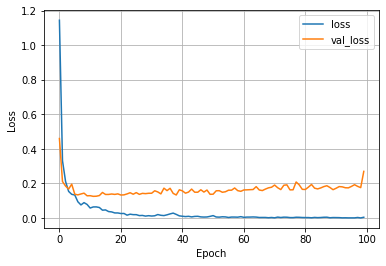

In [ ]:
plot_loss(history_model_tunning)

In [ ]:
loss, accuracy = fine_model.evaluate(test_iterator, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

3/3 - 3s - loss: 0.2702 - accuracy: 0.9423
Test accuracy: 0.942307710647583
Test loss: 0.2701703608036041
